## Classification and Feature Engineering

# Bank Marketing Campaign Success Prediction

##### **OBJECTIVE 1:** To practice various steps and due diligence needed to train successful classification models

##### **AIM:** To optimize the marketing budget across various campaigns, by predicting the customers for which a particular marketing campaign will be successful

##### **Dataset from Kaggle:** https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data  

#### 1) Performing exploratory data analysis (EDA) on the data

#### Importing required libraries and packages

In [ ]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import seaborn as sns            # For creating statistical plots
import matplotlib.pyplot as plt  # For creating visualizations

#### Uploading data files


In [ ]:
# Colab-specific library to load files
from google.colab import files

# Uploading the given data files
uploaded = files.upload()

# Confirming the upload
for fn in uploaded.keys():
  print(f'You uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving bank.csv to bank.csv
You uploaded file "bank.csv" with length 918960 bytes


#### Exploring the data


In [ ]:
# Reading the csv file into a pandas dataframe
df = pd.read_csv('bank.csv')

# Printing first five rows of the dataframe to get an overview of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
print('Number of Rows =', df.shape[0])     # printing no of rows
print('Number of Columns =', df.shape[1])  # printing no of columns

Number of Rows = 11162
Number of Columns = 17


In [ ]:
# Checking the datatype of each column and null-values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


#### Observations:

* Since, the no of non-null entries in each column is equal to the total no of rows, there are no missing-values

* From the above output it is clear that the columns like job, marital, education, default, housing, loan, contact, month, poutcome, and deposit are currently stored as object, which means they are categorical and need to be converted to numeric values. So I have used Label Encoding and One-Hot Encoding to convert these

*  Label Encoding: Converts categorical labels to integer values (e.g., yes to 1, no to 0)

*  One-Hot Encoding: Converts categorical labels to binary variables (creates additional columns for each unique value)

* Columns like age, balance, day, campaign, pdays, and previous are numerical (int64), so they don't need datatype changes.





In [ ]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder      # For label encoding

# Label Encoding the binary columns (yes/no)
binary_col = ['default', 'housing', 'loan', 'deposit']
le = LabelEncoder()
for col in binary_col:
    df[col] = le.fit_transform(df[col])

# Applying One-Hot Encoding for other categorical variables with more than two categories
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=False)


In [ ]:
# Checking the modified dataset
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,56,0,45,0,0,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,41,0,1270,1,0,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Checking the new datatypes of the columns
print(df.dtypes)

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
deposit                int64
job_admin.              bool
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_divorced        bool
marital_married         bool
marital_single          bool
education_primary       bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
contact_cellular        bool
contact_telephone       bool
contact_unknown         bool
month_apr               bool
month_aug     

#### **1a) Which variables are usable, and which are not? Why?**

#### Here the target variable is the "deposit", i.e., whether a customer subscribes to a term deposit

In [ ]:

# Creating a table to summarize useful and unwanted variables
data = {
    'Variable': ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
                 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit', 'duration'],
    'Usable/Not-Usable': ['Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable',
                          'Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable', 'Usable'],
    'Reason': [
        'Age of the customer could influence deposit subscription likelihood',
        'Job likely affects income and financial decision-making',
        'Marital status may influence financial priorities and decisions',
        'Education may reflect financial literacy and income level',
        'Credit in default can indicate financial instability',
        'Account balance directly reflects financial status',
        'Having a housing loan may reduce likelihood of deposit investment',
        'Having a personal loan may affect ability to invest in a deposit',
        'Contact type could influence customer response to campaign',
        'Day of month may indicate patterns in customer behavior(Can be dropped)',
        'Month may reveal seasonal trends in financial activity',
        'Number of contacts during the campaign may influence customer decision',
        'Recency of last contact may affect campaign success',
        'Number of previous contacts could reflect customer engagement history',
        'Outcome of previous campaign can predict current campaign success',
        'Target variable that we are trying to predict',
        'Call duration gives an idea abt the customer interest for subscribing to a deposit'
    ]
}

# Creating a DataFrame
var = pd.DataFrame(data)

# Displaying the table
var

,Variable,Usable/Not-Usable,Reason
0,age,Usable,Age of the customer could influence deposit su...
1,job,Usable,Job likely affects income and financial decisi...
2,marital,Usable,Marital status may influence financial priorit...
3,education,Usable,Education may reflect financial literacy and i...
4,default,Usable,Credit in default can indicate financial insta...
5,balance,Usable,Account balance directly reflects financial st...
6,housing,Usable,Having a housing loan may reduce likelihood of...
7,loan,Usable,Having a personal loan may affect ability to i...
8,contact,Usable,Contact type could influence customer response...
9,day,Usable,Day of month may indicate patterns in customer...


In [ ]:
X = df.drop(columns=['deposit'])  # Features(X): all columns except the target variable
Y = df['deposit']                 # Target variable(Y): whether the client subscribed to a deposit

I have divided the dataset into Features(X) and target variable(Y)

#### **1b) Are there significant correlations or other relations among variables?**

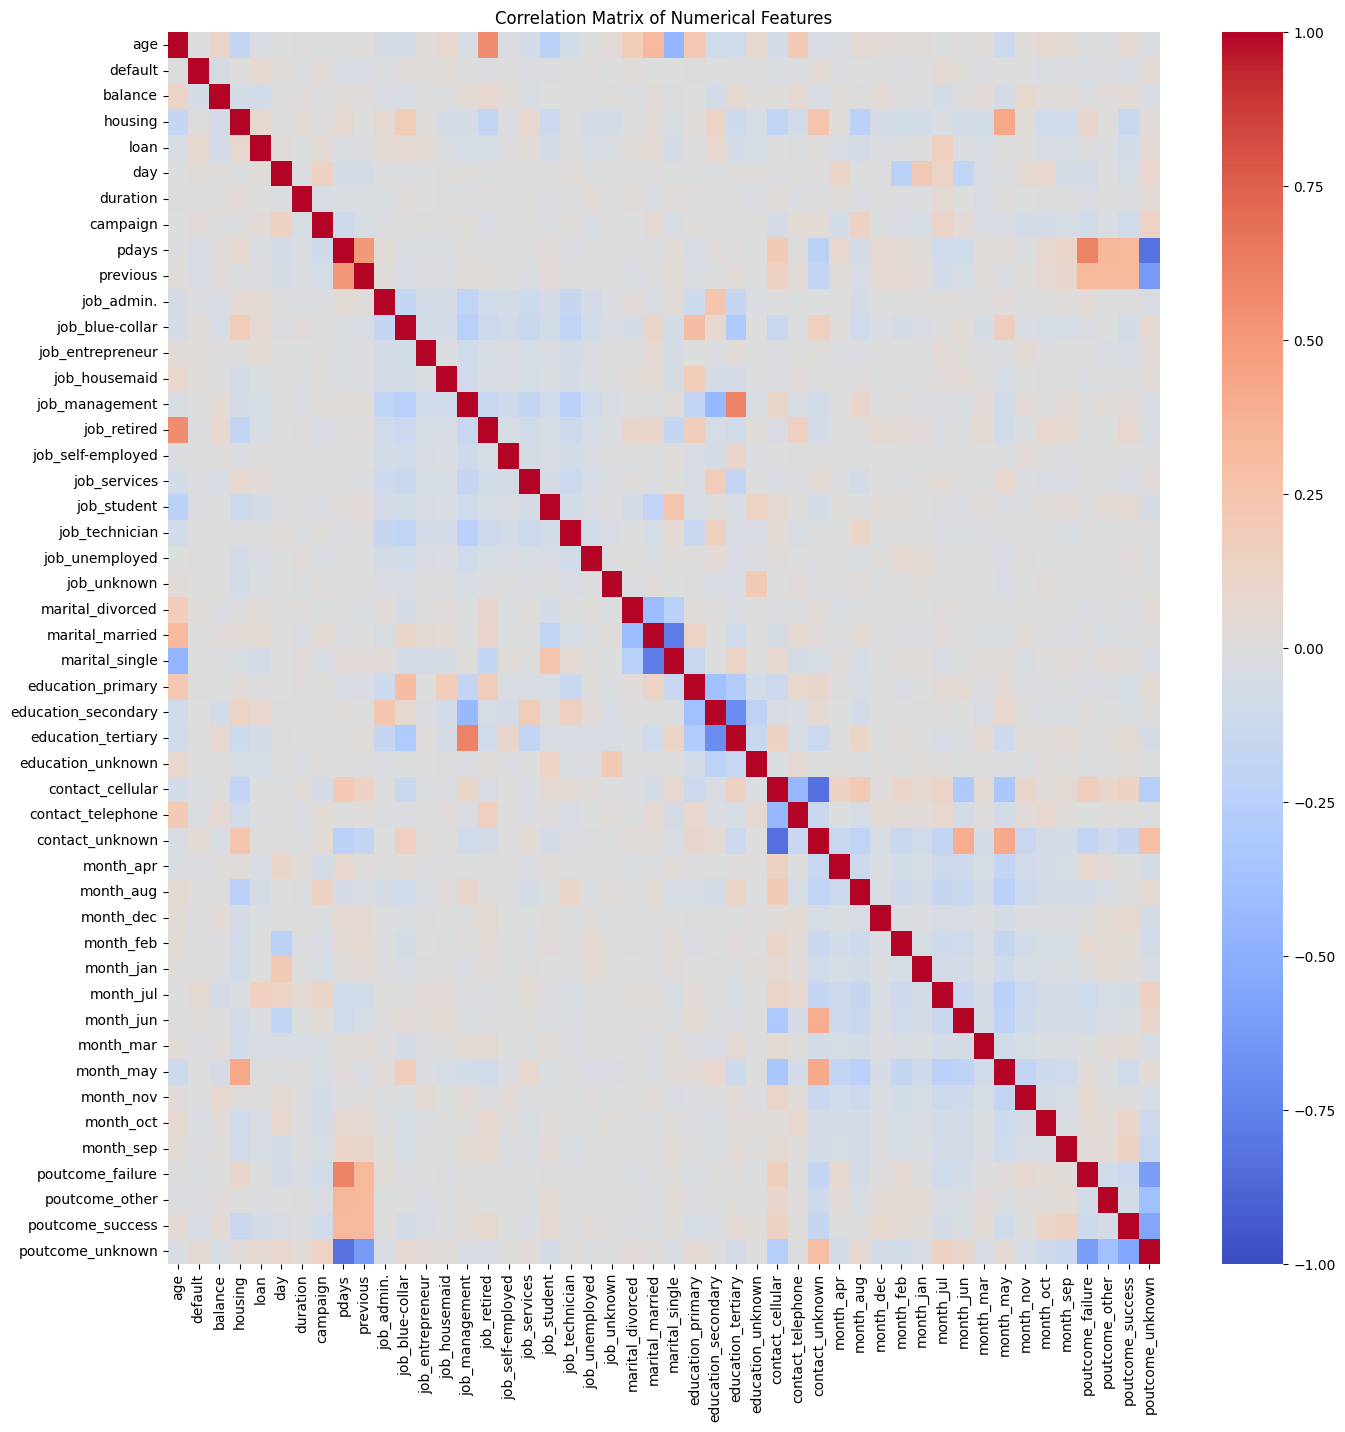

In [ ]:
# Generating the correlation matrix for the features
correlation_matrix = X.corr()

# Visualizing the entire correlation matrix using a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

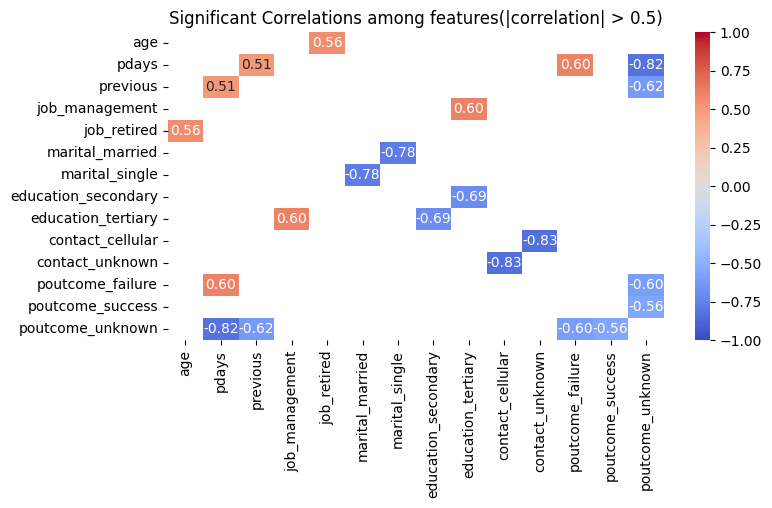

In [ ]:
# Displaying the top correlations (absolute value > 0.5 for significant correlations)
threshold = 0.5
# Taking the correlations above the threshold and ignoring the correlation == 1 for good visualization
significant_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Dropping rows and columns that are all NaN
significant_corr = significant_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualizing the significant correlations using a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Significant Correlations among features(|correlation| > 0.5)')
plt.show()

#### **Observations:**
* Except for the above mentioned columns ,the remaining ones have the correlation less than 0.5

*  "Contact_cellular" and "contact_unknown" are the features that have the highest amount of -ve correlation (-0.83)


* "poutcome_unknown" and "pdays" are the features that have the second highest amount of -ve correlation (-0.82)
* education_tertiary and job_management have the higest amount of +ve correlation (0.6)








<ipython-input-14-7eae4c8ac9b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlation_with_deposit.index, y=sorted_correlation_with_deposit.values, palette='coolwarm')


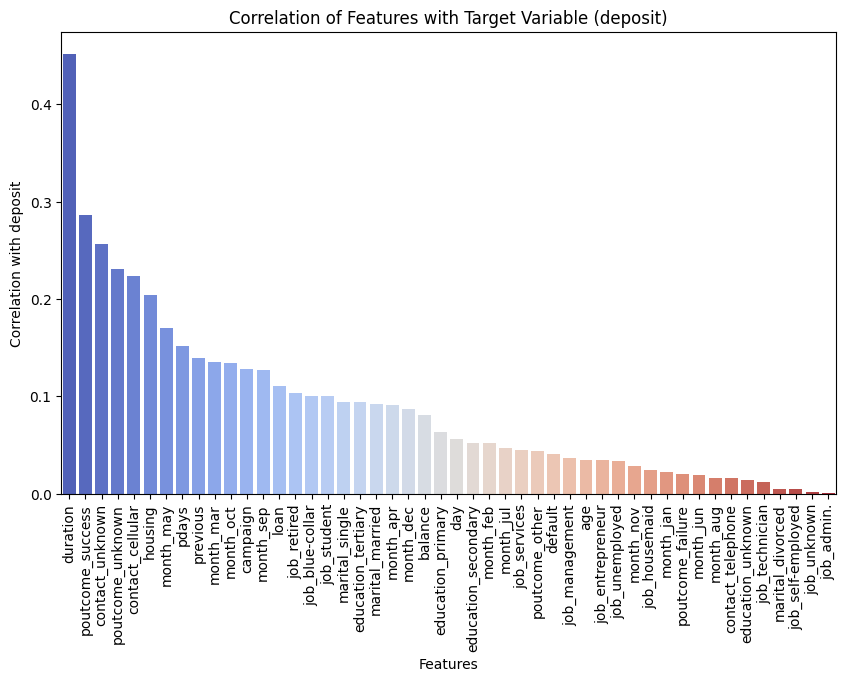

In [ ]:

# Computing the correlation of each feature with the target variable 'deposit'
correlation_with_deposit = df.corr()['deposit'].drop('deposit')

# Sorting the correlations by absolute value in descending order
sorted_correlation_with_deposit = correlation_with_deposit.abs().sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_correlation_with_deposit.index, y=sorted_correlation_with_deposit.values, palette='coolwarm')
plt.title('Correlation of Features with Target Variable (deposit)')
plt.xlabel('Features')
plt.ylabel('Correlation with deposit')
plt.xticks(rotation=90)
plt.show()

* The feature "duration" has the highest correlation with the target variable "deposit" as compared to the other features. Next "poutcome_success" has the highest correlation with the target variable




#### **1c) Are the classes balanced?**


*  "Deposit" is the target variable and the classes are "YES", "NO"




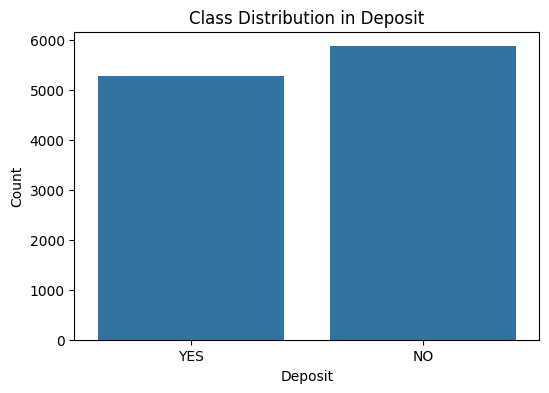

Class distribution in 'Deposit':
YES: 5289 
 NO: 5873


In [ ]:
# Creating two empty lists to store the no.of "1" and "0" in the deposit column
dep = []
not_dep = []

# Looping over each row to get the total no.of "1" and "0" in the deposit column
for i in range(df.shape[0]):
  if df.iloc[i]['deposit'] == 1:
    dep.append(i)
  else:
    not_dep.append(i)


classes = ['YES','NO']
count = [len(dep),len(not_dep)]

# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=classes , y=count )
plt.title('Class Distribution in Deposit')
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.show()

# Printing the class distribution
print("Class distribution in 'Deposit':")
print(f"YES: {len(dep)} \n NO: {len(not_dep)}")

##### **Observations:**


* Proportion of "YES" : 47.3%


* Proportion of "NO"   : 52.7%


* The proportions of the classes are fairly close
* Hence, the classes can be treated as BALANCED classes










#### **1d) Which classes will you use?**


#### Significance of each class in "Deposit"
* Class "YES": Indicates that the customer subscribed to the deposit

* Class "NO": Indicates that the customer did not subscribe to the deposit



*  Since, deposit is the target variable and both the classes are important, I will use both of them











#### **2) Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. and state the reason for the choice**



#### Performance Metrics

#### Accuracy
**Definition:** The ratio of correctly predicted instances to the total instances

**Formula:**  
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$  
**Usage:** Useful when the classes are balanced  
**Limitation:** Misleading if classes are imbalanced


---



#### F1 Score
**Definition:** The harmonic mean of precision and recall

**Formula:**  
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$  
**Usage:** Useful when we want to balance precision and recall, especially with imbalanced classes


---

#### Balanced Accuracy
**Definition:** The average of recall obtained on each class.  
**Formula:**  
$$ \text{Balanced Accuracy} = \frac{TPR + TNR}{2} $$  
**Usage:** Useful for imbalanced datasets to give equal weight to both classes.


---



#### AUC (Area Under the ROC Curve)
**Definition:** Measures the ability of the model to distinguish between classes.  
**Usage:** Useful for evaluating the performance across all classification thresholds.  
**Limitation:** Requires the calculation of the ROC curve.


---



#### Confusion Matrix
**Definition:** A table that describes the performance of a classification model on a set of test data for which the true values are known.  
**Usage:** Provides a complete picture of model performance, including true positives, true negatives, false positives, and false negatives.




*  **Since the classes are balanced, the metrics like Accuracy, AUC and confusion matrix can be used to infer the model's performance. Among these "Accuracy" is most useful and simpler metric to interpret**









Accuracy: 0.8456255598686175
AUC: 0.9216730478096331


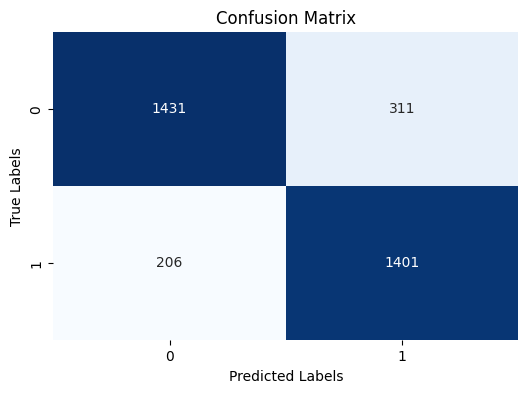

In [ ]:
# Importing necessary libraries for metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing a RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Training the model

# Making predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC calculation

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Printing results
print("Accuracy:", accuracy)
print("AUC:", auc)

# Confusion matrix to get a better understanding of the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### **3. Develop a strategy to filter and code variables**
#### **a. Should you be using continuous variables as they are, or should you normalize them, or take a transform? Why?**




* In the dataset the continuous variables like "**age, balance, day,duration,campaign, pdays, and previous**" have a wide range of values.Using them as they are, can lead to unequal contributions to the model
* To ensure that all features contribute equally to the model and to improve the performance of distance-based models (like SVM, KNN, or neural networks), normalization is to be done

*  **Normalization**: It is used for the algorithms sensitive to the scale of data (SVM, K-means etc..).Features are normalized to a range, like [0, 1]


* **Log Transformations**: For variables with skewed distributions, like "balance", "duration" applying a log transformation reduces skewness and make patterns more discernible


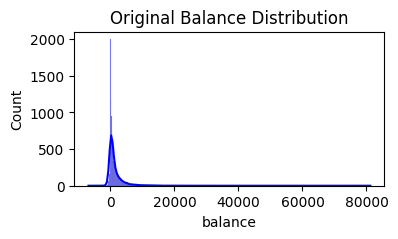

In [ ]:
# Plotting the original balance distribution
plt.figure(figsize=(4,2))
sns.histplot(df['balance'], kde=True, color='blue')
plt.title('Original Balance Distribution')
plt.xlabel('balance')
plt.show()

* From the graph it is clear that the column "balance" is right-skewed. Hence it should undergo log-transformation

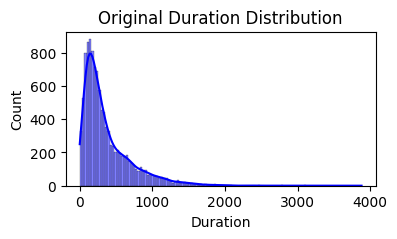

In [ ]:
# Plotting the original duration distribution
plt.figure(figsize=(4,2))
sns.histplot(df['duration'], kde=True, color='blue')
plt.title('Original Duration Distribution')
plt.xlabel('Duration')
plt.show()

* From the graph it is clear that the column "duration" is right-skewed. Hence it should undergo log-transformation



*  Since "balance" and "duration" variables are highly skewed, first I have applied log-transformation and then Min-Max normalization




   balance_log
0     0.686404
1     0.338676
2     0.632263
3     0.691286
4     0.461785


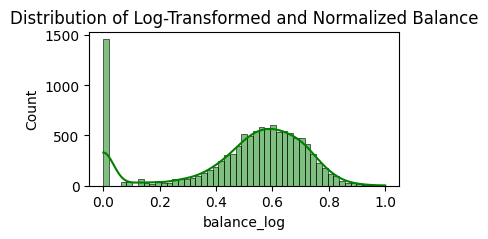

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ensuring there are no negative values by setting negative balances to a small constant
df['balance'] = df['balance'].apply(lambda x: max(x, 0))

# Applying a log transformation to handle skewness
df['balance_log'] = np.log1p(df['balance'])

# Applying MinMax Scaling after the log transformation
scaler = MinMaxScaler()
df[['balance_log']] = scaler.fit_transform(df[['balance_log']])

# Dropping the original 'balance' column to use the transformed one
df = df.drop(columns=['balance'])

# Displaying transformed 'balance_log' column
print(df[['balance_log']].head())

# Visualizing the distribution after log transformation and scaling
plt.figure(figsize=(4,2))
sns.histplot(df['balance_log'], kde=True, color='green')
plt.title('Distribution of Log-Transformed and Normalized Balance')
plt.xlabel('balance_log')
plt.show()

   duration_log
0      0.816586
1      0.864287
2      0.856668
3      0.734690
4      0.755652


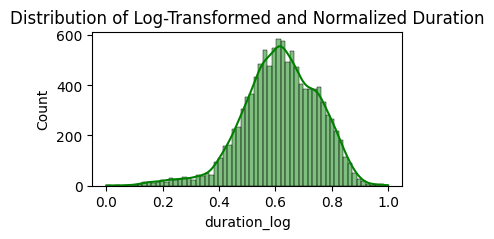

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ensuring there are no negative values by setting negative balances to a small constant
df['duration'] = df['duration'].apply(lambda x: max(x, 0))

# Applying a log transformation to handle skewness
df['duration_log'] = np.log1p(df['duration'])

# Applying MinMax Scaling after the log transformation
scaler = MinMaxScaler()
df[['duration_log']] = scaler.fit_transform(df[['duration_log']])

# Dropping the original 'balance' column to use the transformed one
df = df.drop(columns=['duration'])

# Displaying transformed 'balance_log' column
print(df[['duration_log']].head())

# Visualizing the distribution after log transformation and scaling
plt.figure(figsize=(4,2))
sns.histplot(df['duration_log'], kde=True, color='green')
plt.title('Distribution of Log-Transformed and Normalized Duration')
plt.xlabel('duration_log')
plt.show()

In [ ]:
# Normalizing the remaining continuous features
contin_vars = ['age', 'day', 'campaign', 'pdays', 'previous']

scaler = MinMaxScaler()
df[contin_vars] = scaler.fit_transform(df[contin_vars])

print(df[contin_vars].head())

        age       day  campaign  pdays  previous
0  0.532468  0.133333  0.000000    0.0       0.0
1  0.493506  0.133333  0.000000    0.0       0.0
2  0.298701  0.133333  0.000000    0.0       0.0
3  0.480519  0.133333  0.000000    0.0       0.0
4  0.467532  0.133333  0.016129    0.0       0.0


In [ ]:
# Checking the modified dataframe
df.head()

,age,default,housing,loan,day,campaign,pdays,previous,deposit,job_admin.,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance_log,duration_log
0,0.532468,0,1,0,0.133333,0.000000,0.0,0.0,1,True,...,True,False,False,False,False,False,False,True,0.686404,0.816586
1,0.493506,0,0,0,0.133333,0.000000,0.0,0.0,1,True,...,True,False,False,False,False,False,False,True,0.338676,0.864287
2,0.298701,0,1,0,0.133333,0.000000,0.0,0.0,1,False,...,True,False,False,False,False,False,False,True,0.632263,0.856668
3,0.480519,0,1,0,0.133333,0.000000,0.0,0.0,1,False,...,True,False,False,False,False,False,False,True,0.691286,0.734690
4,0.467532,0,0,0,0.133333,0.016129,0.0,0.0,1,True,...,True,False,False,False,False,False,False,True,0.461785,0.755652


#### **b. Should you be using all values of discrete variables, or should you try to reduce them by combining some of the values?**




* Generally, it's helpful to combine categories in discrete variables if certain values have little influence on the target variable or occur infrequently. This can reduce dimensionality and make the model more interpretable
* But here mostly all the discrete variables columns have impact on the deposit variable ,soI have used all of the discrete variables and didnot group any columns







#### **c. Are some variables very likely to be unreliable, noisy, or otherwise immaterial?**

For identifying variables that may be unreliable, noisy, or immaterial, we can consider several key factors.

* 1.Discrete variables with one category comprising 95% or more of the entries may not provide useful differentiation and could be consolidated or dropped
* 2.Numeric variables with very low variance, are unlikely to contribute meaningful information and may introduce noise into the model
* 3.Variables that exhibit little to no correlation with the target variable (deposit),  may not enhance model accuracy and could add unnecessary complexity


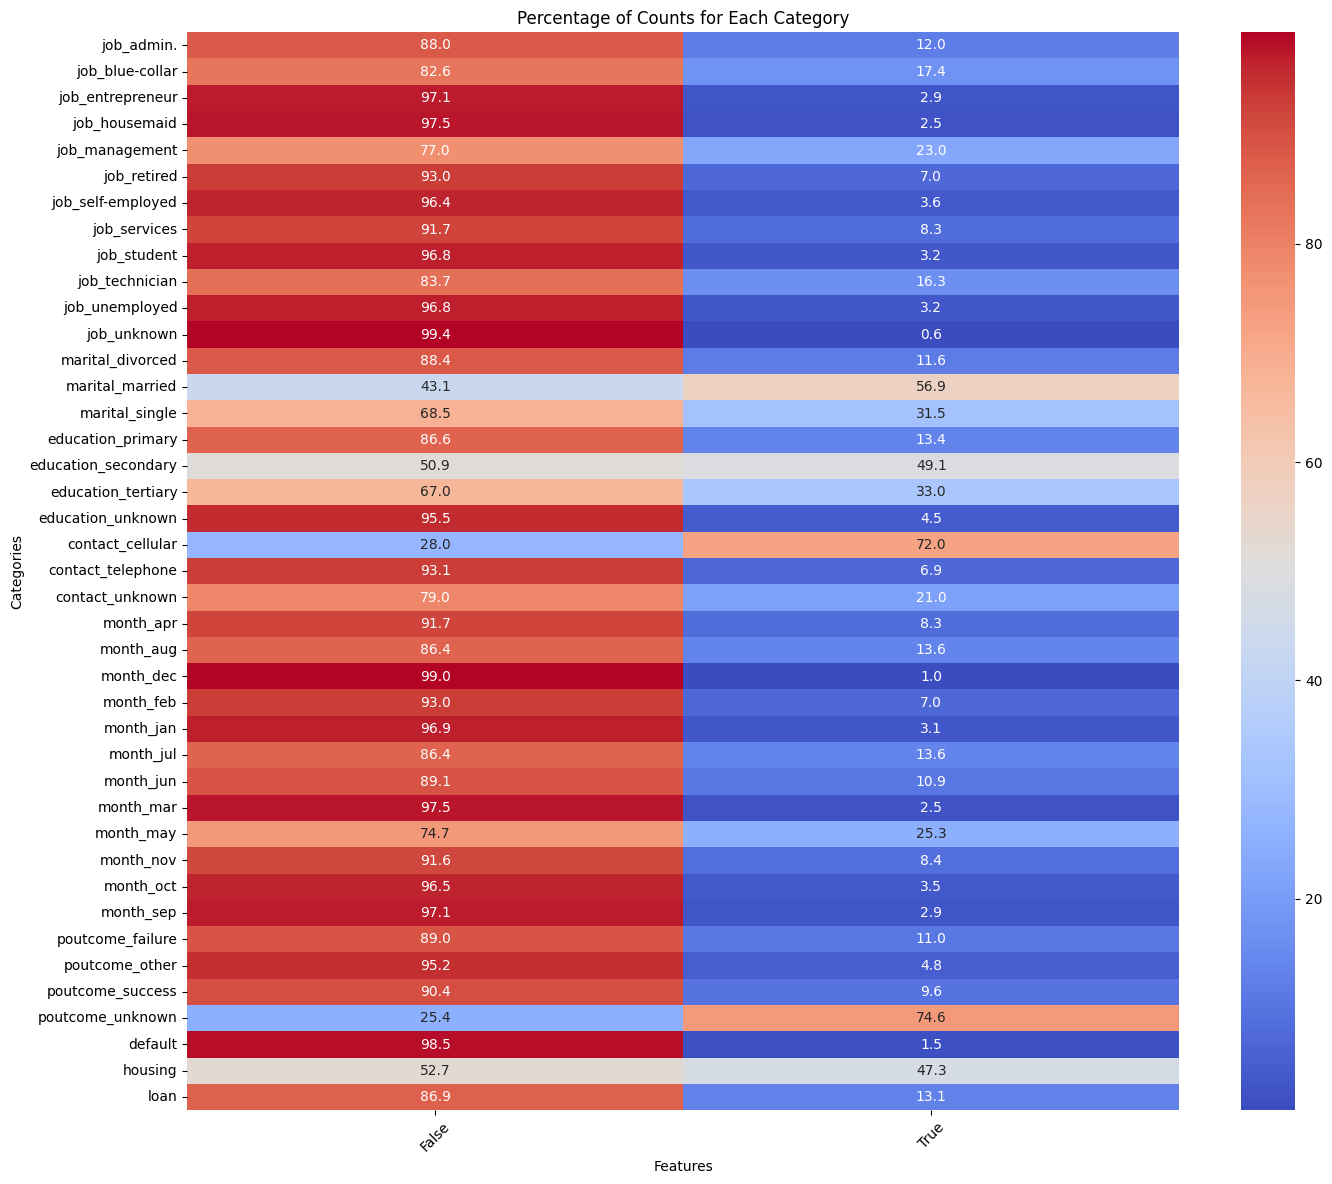

In [ ]:
# Selecting discrete columns [boolean and int64(0/1)]
discrete_columns = df.select_dtypes(include=['bool']).columns.tolist() + ['default', 'housing', 'loan']

# Creating a pivot table for counts
count_table = df[discrete_columns].apply(lambda x: x.value_counts()).fillna(0).astype(int).T
# Creating a pivot table for percentages
percentage_table = df[discrete_columns].apply(lambda x: x.value_counts(normalize=True) * 100).fillna(0).T

# Visualizing the percentage table using a heatmap
plt.figure(figsize=(16,14))
sns.heatmap(percentage_table, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Percentage of Counts for Each Category')
plt.xlabel('Features')
plt.ylabel('Categories')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Selecting discrete columns [boolean and int64(0/1)]
discrete_columns = df.select_dtypes(include=['bool']).columns.tolist() + ['default', 'housing', 'loan']


# Initializing a DataFrame to store the counts and percentages
counts_df = pd.DataFrame(index=discrete_columns, columns=['True Count', 'False Count', 'True %', 'False %'])

# Calculating counts and percentages
for col in discrete_columns:
    true_count = df[col].sum()          # Count of True
    false_count = len(df) - true_count  # Count of False
    counts_df.loc[col] = [true_count, false_count, true_count / len(df) * 100, false_count / len(df) * 100]

# Filtering columns where either True % or False % > 95
filtered_columns = counts_df[(counts_df['True %'] > 95) | (counts_df['False %'] > 95)].index.tolist()

# New DataFrame with filtered columns
filtered_df = df[filtered_columns]

# Displaying the filtered DataFrame
print(filtered_df.head())


   job_entrepreneur  job_housemaid  job_self-employed  job_student  \
0             False          False              False        False   
1             False          False              False        False   
2             False          False              False        False   
3             False          False              False        False   
4             False          False              False        False   

   job_unemployed  job_unknown  education_unknown  month_dec  month_jan  \
0           False        False              False      False      False   
1           False        False              False      False      False   
2           False        False              False      False      False   
3           False        False              False      False      False   
4           False        False              False      False      False   

   month_mar  month_oct  month_sep  poutcome_other  default  
0      False      False      False           False        0  
1   

In [ ]:
# Checking low variance in continuous variables
low_variance_cols = []
for col in contin_vars:
    variance = df[col].var()
    print(f"{col} variance: {variance}")
    if variance < 0.01:  # Threshold = 0.01
        low_variance_cols.append(col)

age variance: 0.02393799384550921
day variance: 0.07878761601940991
campaign variance: 0.0019276025449849116
pdays variance: 0.01618051899387121
previous variance: 0.001561622202865243


<ipython-input-25-81fcb695b9f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlation_with_deposit.index, y=sorted_correlation_with_deposit.values, palette='coolwarm')


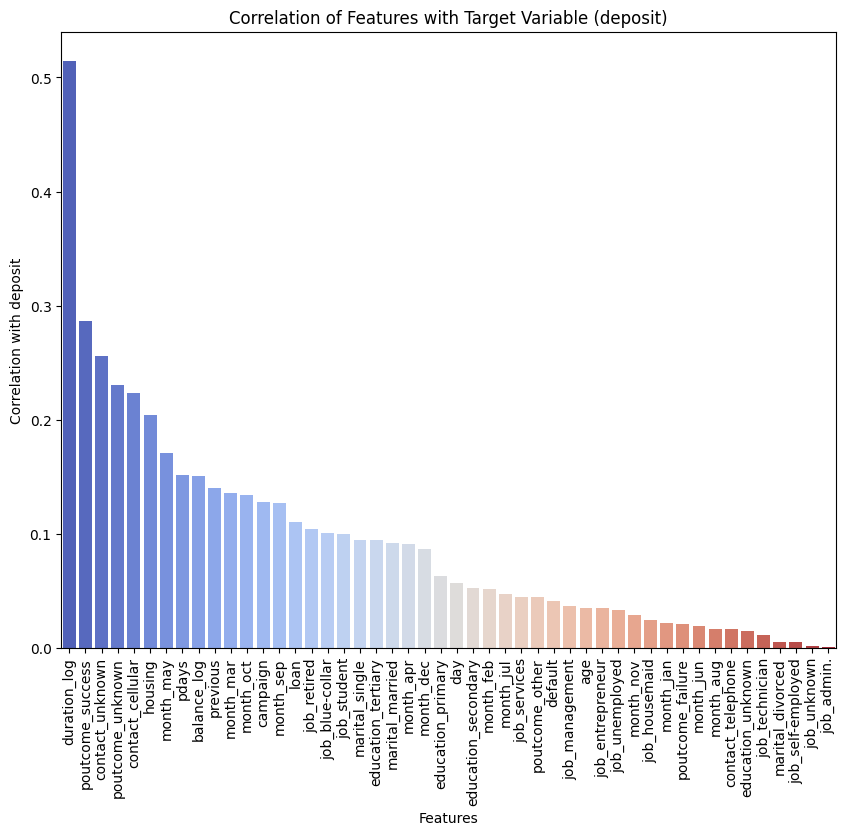

Features with low correlation with deposit:
month_jul            0.047368
job_services         0.044531
poutcome_other       0.044059
default              0.040680
job_management       0.036301
age                  0.034901
job_entrepreneur     0.034443
job_unemployed       0.033487
month_nov            0.028278
job_housemaid        0.024155
month_jan            0.021803
poutcome_failure     0.020714
month_jun            0.018982
month_aug            0.016621
contact_telephone    0.016420
education_unknown    0.014355
job_technician       0.011557
marital_divorced     0.005228
job_self-employed    0.004707
job_unknown          0.001889
job_admin.           0.000610
Name: deposit, dtype: float64


In [ ]:
# Computing the correlation of each feature with the target variable 'deposit'
correlation_with_deposit = df.corr()['deposit'].drop('deposit')

# Sorting the correlations by absolute value in descending order
sorted_correlation_with_deposit = correlation_with_deposit.abs().sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(10,8))
sns.barplot(x=sorted_correlation_with_deposit.index, y=sorted_correlation_with_deposit.values, palette='coolwarm')
plt.title('Correlation of Features with Target Variable (deposit)')
plt.xlabel('Features')
plt.ylabel('Correlation with deposit')
plt.xticks(rotation=90)
plt.show()


# Defining a threshold for low correlation
low_correlation_threshold = 0.05  # You can adjust this value

# Getting features with low correlation with deposit
low_correlation_features = sorted_correlation_with_deposit[sorted_correlation_with_deposit < low_correlation_threshold]

# Display the low correlation features
print("Features with low correlation with deposit:")
print(low_correlation_features)

*  Low-variance continuous variables are:


1. age variance: 0.02393799384550921
2. day variance: 0.07878761601940991
3. campaign variance: 0.0019276025449849116
4. pdays variance: 0.01618051899387121
5. previous variance: 0.001561622202865243




*  But they have significant correlation with the target variable "deposit".So it is risky to drop them

After running all the above different analyses the following columns are chosen based on the following reasons:



 * Below columns have imbalanced categories: True % or False % > 95
   

1. education_unknown
2. poutcome_other
3. default



* Discrete variables with little correlation to deposit



1. education_unknown : 0.014355
2. poutcome_other    : 0.044059
3. default           : 0.040680



     








* Hence I have dropped the columns 'education_unknown', 'poutcome_other', 'default'

In [ ]:
# List containing the columns to drop
columns_to_drop = ['education_unknown', 'poutcome_other', 'default']

# Dropping the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Optionally, you can check the remaining columns
print("Remaining columns after dropping:")
print(df.columns)


Remaining columns after dropping:
Index(['age', 'housing', 'loan', 'day', 'campaign', 'pdays', 'previous',
       'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown',
       'balance_log', 'duration_log'],
      dtype='object')


In [ ]:
df.info()

#### **4. Carve out some test data. Should this be balanced in some way?**


In [ ]:
deposit_counts = df['deposit'].value_counts()
deposit_counts.index = deposit_counts.index.map({0: 'No', 1: 'Yes'})
print(deposit_counts)

deposit
No     5873
Yes    5289
Name: count, dtype: int64


* Proportion of "YES" : 47.3%


* Proportion of "NO"   : 52.7%


* The proportions of the classes are fairly close
* Hence, the classes are BALANCED

When creating a test set from my dataset, I consider the following:

- **Stratified Sampling**: Used to ensure that the class distribution of the target variable (e.g., "yes" vs. "no" deposits) is maintained in both the training and test sets to avoid bias
  
- **Random Sampling**: For balanced datasets, we can randomly select 20-30% of the data as the test set to ensure a fair evaluation




* Yes, I think it's important to balance the test data, particularly with imbalanced datasets. I usually opt for stratified sampling to make sure the test set accurately reflects the distribution of the target variable.

In [ ]:
# Separating the features and target variable
X = df.drop('deposit', axis=1)
y = df['deposit']

# Using stratified sampling to keep the proportions in the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Checking the proportions in the training and testing sets
train_deposit_proportions = y_train.value_counts(normalize=True)
test_deposit_proportions = y_test.value_counts(normalize=True)

print("Training set proportions:")
print(train_deposit_proportions)
print("\nTesting set proportions:")
print(test_deposit_proportions)


Training set proportions:
deposit
0    0.526151
1    0.473849
Name: proportion, dtype: float64

Testing set proportions:
deposit
0    0.526198
1    0.473802
Name: proportion, dtype: float64


#### **5. Using five-fold cross-validation to find the reasonable hyperparameter settings**
#### a. RBF kernel SVM with kernel width and regularization as hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Defining the model
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

# Defining the hyperparameter grid
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],         # Regularization parameter
    'svm__gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient
}

# Setting up GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

# Fetching the best model
best_svm_model = grid_search_svm.best_estimator_

# Predicting on the test data
y_pred = best_svm_model.predict(X_test)

# Calculating the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy
print("Accuracy of the SVM model on test set:", accuracy)


Best parameters for SVM: {'svm__C': 10, 'svm__gamma': 0.01}
Best cross-validation score for SVM: 0.8484709270046205
Accuracy of the SVM model on test set: 0.8540080609046127


To build a SVM model, I have used GridSearch  for hyperparameter tuning

Obtained the best hyperparameters {'svm__C': 10, 'svm__gamma': 0.01} after training the model on the training data

b. Neural network with single ReLU hidden layer and Softmax output

In [ ]:
from sklearn.neural_network import MLPClassifier


# Defining the model
nn_model = MLPClassifier(max_iter=1000)

# Defining the hyperparameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (50,)],  # Number of neurons in the hidden layer
    'alpha': [0.0001, 0.001, 0.01, 0.1],                # Weight decay(often referred to as L2 regularization) to prevent overfitting
}

# Setting up GridSearchCV
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nn.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Neural Network:", grid_search_nn.best_params_)
print("Best cross-validation score for Neural Network:", grid_search_nn.best_score_)

# Getting the best model
best_nn_model = grid_search_nn.best_estimator_

# Predicting on the test data
y_pred_nn = best_nn_model.predict(X_test)

# Calculating accuracy on the test set
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Printing the accuracy
print("Accuracy of the Neural Network model on test set:", accuracy_nn)


Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
Best cross-validation score for Neural Network: 0.8484716170902852
Accuracy of the Neural Network model on test set: 0.8562472010747872


To build an NN model, I have used GridSearch  for hyperparameter tuning

Obtained the best hyperparameters {'alpha': 0.0001, 'hidden_layer_sizes': (10,)} after training the model on the training data

c. Random forest (max tree depth, max number of variables per node)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Defining the model
rf_model = RandomForestClassifier()

# Defining the hyperparameter grid
param_grid_rf = {
    'max_depth': [None, 10, 20, 30, 40],    # Max tree depth
    'max_features': [None, 'sqrt', 'log2']  # Max number of features
}

# Setting up GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Getting the best model
best_rf_model = grid_search_rf.best_estimator_

# Predicting on the test data
y_pred_rf = best_rf_model.predict(X_test)

# Calculating accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Printing the accuracy
print("Accuracy of the Random Forest model on test set:", accuracy_rf)


Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt'}
Best cross-validation score for Random Forest: 0.8528384791766651
Accuracy of the Random Forest model on test set: 0.8584863412449619


To build a Random forest model, I have used GridSearch  for hyperparameter tuning

Obtained the best hyperparameters{'max_depth': 20, 'max_features': 'sqrt'} after training the model on the training data

6. **Check feature importance for each model to see if the same variables are important for each model. Read upon how to find feature importance**

* SVM Feature Importance (using Permutation Importance)

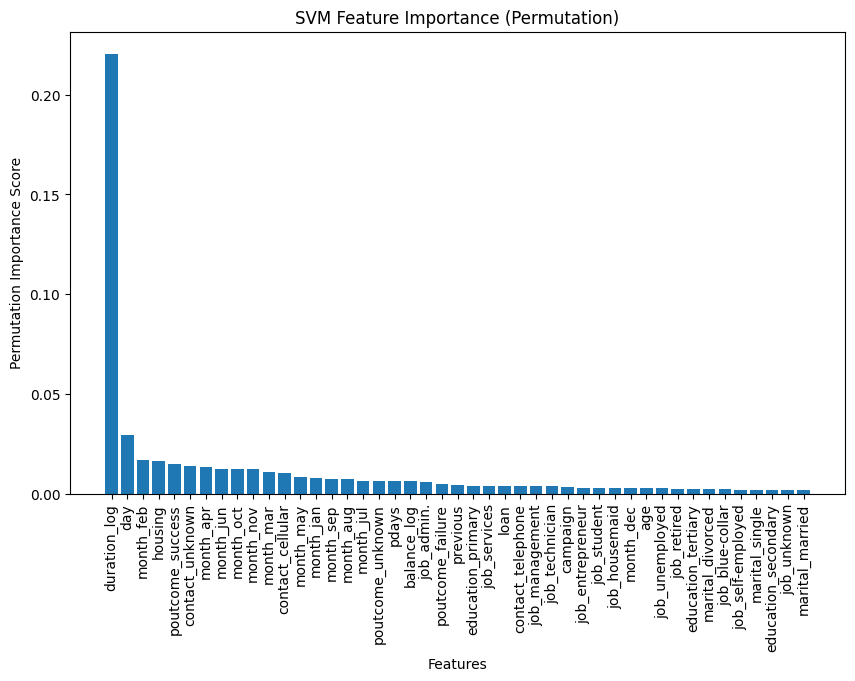

In [ ]:
from sklearn.inspection import permutation_importance

# Calculating permutation importance
perm_importance = permutation_importance(best_svm_model, X_train, y_train, n_repeats=10, random_state=42)

# Plotting permutation importance
plt.figure(figsize=(10, 6))
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.bar(range(X_train.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=90)
plt.title("SVM Feature Importance (Permutation)")
plt.xlabel("Features")
plt.ylabel("Permutation Importance Score")
plt.show()


In this code, I calculated and visualized the feature importance for the SVM model using permutation importance:

I used permutation_importance on the optimized SVM model (best_svm_model) to evaluate how each feature affects the model's performance. This method repeatedly shuffles each feature to see its impact on prediction accuracy, helping identify the most influential features.

 I sorted the features by their importance scores in descending order. Then, I created a bar plot to visualize these scores, where each bar represents a feature’s impact on the model. The x-axis lists the features, while the y-axis shows their permutation importance scores, helping to understand which features contribute the most to the SVM model’s predictions.

* Neural Network Feature Importance (using Permutation Importance)

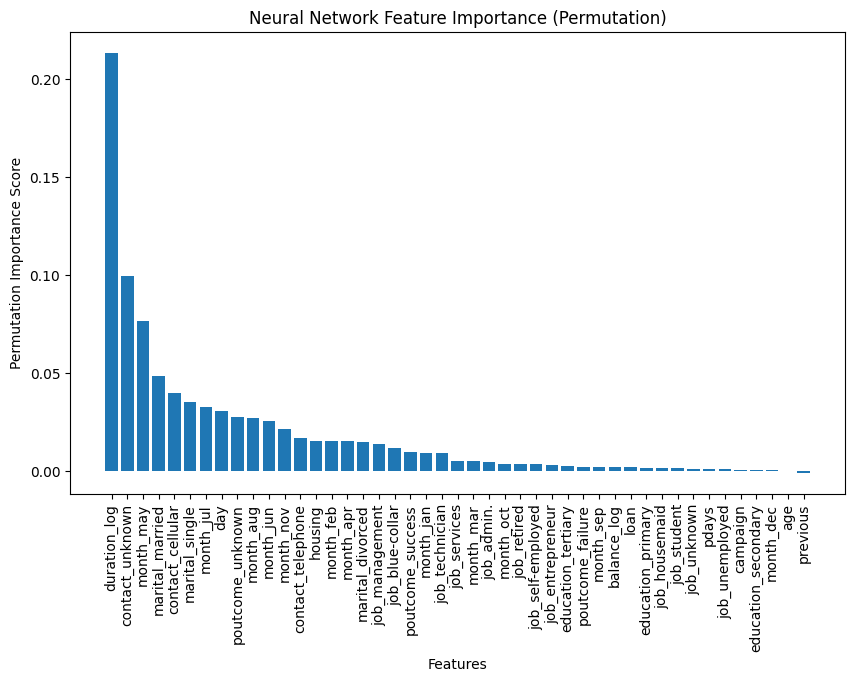

In [ ]:
# Calculating permutation importance for the neural network
nn_perm_importance = permutation_importance(best_nn_model, X_train, y_train, n_repeats=10, random_state=42)

# Plotting permutation importance
plt.figure(figsize=(10, 6))
sorted_idx = nn_perm_importance.importances_mean.argsort()[::-1]
plt.bar(range(X_train.shape[1]), nn_perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=90)
plt.title("Neural Network Feature Importance (Permutation)")
plt.xlabel("Features")
plt.ylabel("Permutation Importance Score")
plt.show()


In this code, I calculated and visualized feature importance for the neural network model using permutation importance:

I have applied permutation_importance on the optimized neural network model (best_nn_model) to measure each feature’s impact on model accuracy. This technique involves shuffling each feature multiple times (10 repeats here) to observe its influence on the model's performance.

I sorted the features by their average importance scores in descending order. Using a bar plot, I displayed these scores, with the x-axis showing feature names and the y-axis showing their importance scores. This plot helps to highlight which features are most significant for the neural network’s predictions.


* Random Forest Feature Importance

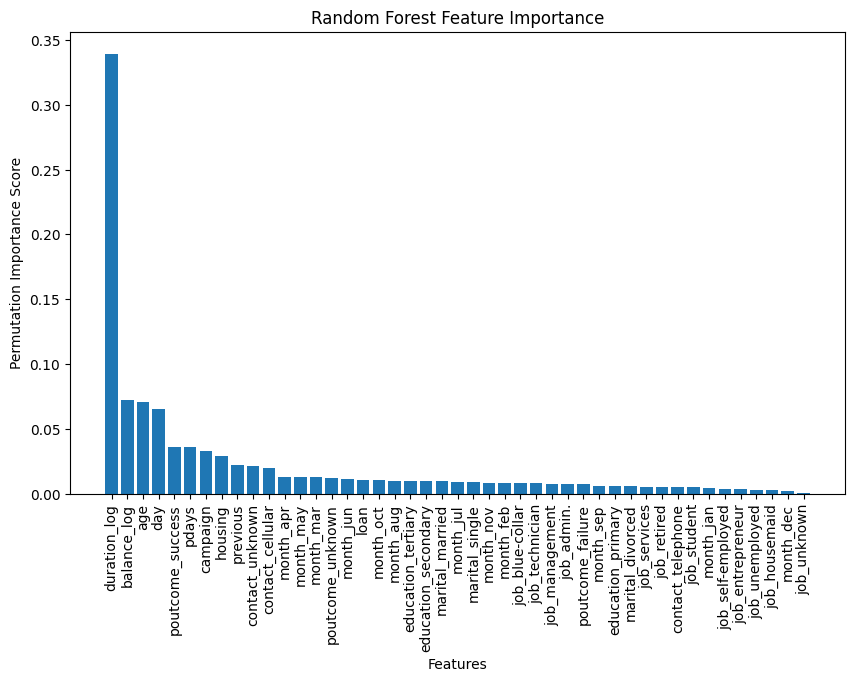

In [ ]:
# Extracting feature importance
rf_importances = best_rf_model.feature_importances_

# Plotting feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(rf_importances)[::-1]
plt.bar(range(X_train.shape[1]), rf_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Permutation Importance Score")
plt.show()

In this code, I extracted and visualized the feature importance for the Random Forest model:

Feature Importance Extraction: I used feature_importances_ from the optimized Random Forest model (best_rf_model) to get the importance scores of each feature. These scores represent each feature's contribution to the model’s decisions.

Sorting and Plotting: I sorted the features by their importance scores in descending order and created a bar plot to display them. The x-axis shows the feature names, while the y-axis represents their importance scores. This visualization helps to quickly identify which features are most influential for the Random Forest model's predictions.

**7. See if removing some features systematically will improve your models
Using recursive feature elimination (RFE)**

SVM with RFECV

Optimal number of features: 35
Selected feature indices: [ 1  2  4  5  6  7  8 11 12 13 14 15 18 20 22 24 25 26 27 28 29 30 32 33
 34 35 36 37 38 39 40 41 42 43 44]


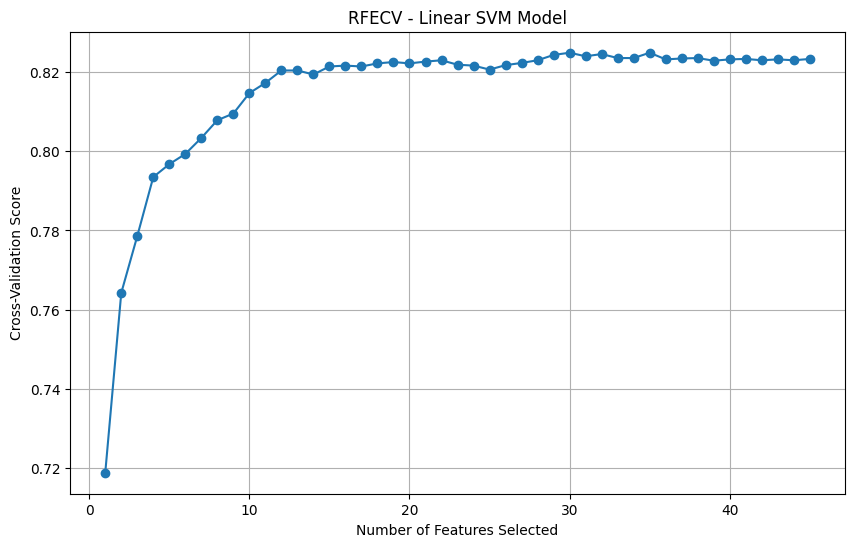

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardizing the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining SVC model with a linear kernel
svm_model = SVC(kernel='linear')

# Using RFECV with SVC directly
rfecv = RFECV(estimator=svm_model, step=1, cv=5, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train_scaled, y_train)

# Printing results
print("Optimal number of features:", rfecv.n_features_)
print("Selected feature indices:", rfecv.get_support(indices=True))

# Plotting results with updated attribute
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.title("RFECV - Linear SVM Model")
plt.grid()
plt.show()



In this code, I used Recursive Feature Elimination with Cross-Validation (RFECV) to select the optimal set of features for a linear SVM model:

I first standardized the training and test data using StandardScaler, which is essential for SVM models to perform well with scaled features.

Then I defined an SVM model with a linear kernel and used RFECV to recursively eliminate the least important features. RFECV evaluated each feature subset's performance with five-fold cross-validation to find the optimal number of features based on accuracy.



The cross_validation score is increasing as the no of features are getting added

The score is maximum when the no of features is 35



Neural Network with RFECV

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

# Using the best-tuned neural network model
sfs = SequentialFeatureSelector(
    estimator=best_nn_model,
    n_features_to_select=15,
    direction="forward",
    scoring="accuracy",
    cv=3,
    n_jobs=-1
)

# Fitting the SequentialFeatureSelector on the training data
sfs.fit(X_train, y_train)

# Getting the indices of the selected features
optimal_features = sfs.get_support(indices=True)
print("Optimal number of features for Neural Network:", len(optimal_features))
print("Selected feature indices:", optimal_features)

# Additional validation of cross-validation accuracy by transforming X_train
X_selected_train = sfs.transform(X_train)
cv_score = cross_val_score(best_nn_model, X_selected_train, y_train, cv=3, scoring="accuracy").mean()  # Use 3 folds here too

print("Cross-validation score with optimal features:", cv_score)


Optimal number of features for Neural Network: 15
Selected feature indices: [ 1  3 20 27 28 31 34 35 36 38 39 41 42 43 44]
Cross-validation score with optimal features: 0.8451100010474569


The score after RFECV for NN is almost the same as before.But the no.of features are less

This indicates model is performing well even when some features are eliminated

Random Forest with RFECV




Optimal number of features for Random Forest: 45


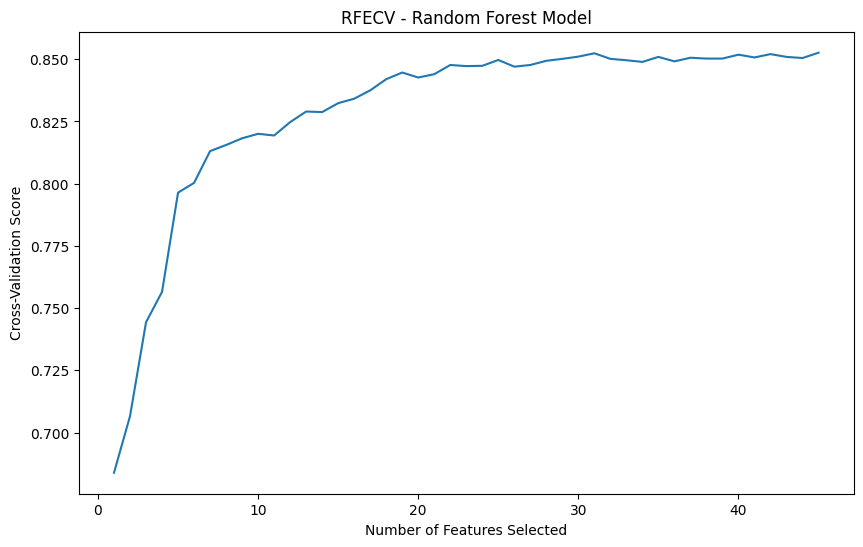

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV


# Initializing RFECV with Random Forest model
rfecv_rf = RFECV(
    estimator=best_rf_model,
    step=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fitting RFECV on training data
rfecv_rf.fit(X_train, y_train)

# Optimal number of features
print("Optimal number of features for Random Forest:", rfecv_rf.n_features_)

# Plotting number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv_rf.cv_results_['mean_test_score']) + 1), rfecv_rf.cv_results_['mean_test_score'])
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.title("RFECV - Random Forest Model")
plt.show()


Here the model chose all the features and the cross_validation score is maintained as before (Before feature elimination)

* **8. Finally, test a few promising models on the test data. Is the model useful for the business?**

Since,all the three models have almost same accuracy levels ,I have used all  of them for testing

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Testing the best SVM model
y_pred_svm = best_svm_model.predict(X_test)
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


# Testing the best Neural Network model
y_pred_nn = best_nn_model.predict(X_test)
print("\nNeural Network Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))


# Testing the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

SVM Model Performance:
Accuracy: 0.8235557545902373

Neural Network Model Performance:
Accuracy: 0.8562472010747872

Random Forest Model Performance:
Accuracy: 0.8584863412449619


In this code each model predicts the label for the test data and finally accuracy is calculated

The accuracy for each model is promising:
SVM achieved around 82.3%, the neural network model 85.6%, and the Random Forest model 85.8%. These high accuracy values indicate that the models provide reliable predictions, making them potentially valuable for the business.

However, accuracy alone doesn’t fully capture the model’s reliability. Further refinement and analysis are essential to ensure that deploying and maintaining the model aligns with business objectives.

If errors are low-cost and the benefits of using the model outweigh any associated risks, the model could be viable for business applications.

Finally, it’s critical that the model aligns with available business resources and supports the anticipated goals.

**9. See if the model will work if you separate the training and test data in at least two pathological ways:**

a. All the training calls were in months other than June and July, while the testing was in June and July.If the test results are worse, then speculate on reasons why

In [ ]:
# Training data not in June and July, testing in June and July

# Filtering training data (not in June or July)
train_data_a = df[~(df['month_jun'] | df['month_jul'])]  # All months except June and July
test_data_a = df[(df['month_jun'] | df['month_jul'])]    # Only June and July

# Separating features and target variable
X_train_a = train_data_a.drop('deposit', axis=1)
y_train_a = train_data_a['deposit']
X_test_a = test_data_a.drop('deposit', axis=1)
y_test_a = test_data_a['deposit']

# Training the best_svm_model
best_svm_model.fit(X_train_a, y_train_a)

# Evaluating model on the test set
test_score_svm = best_svm_model.score(X_test_a, y_test_a)
print("Test score for best_svm_model:", test_score_svm)

# Training the best_nn_model
best_nn_model.fit(X_train_a, y_train_a)

# Evaluating model on the test set
test_score_nn = best_nn_model.score(X_test_a, y_test_a)
print("Test score for best_nn_model:", test_score_nn)

# Training the best_rf_model
best_rf_model.fit(X_train_a, y_train_a)

# Evaluating model on the test set
test_score_rf = best_rf_model.score(X_test_a, y_test_a)
print("Test score for best_svm_model:", test_score_rf)


Test score for best_svm_model: 0.8249269005847953
Test score for best_nn_model: 0.66703216374269
Test score for best_svm_model: 0.8011695906432749



In this code, I filtered the data so that the training set contains records from all months except June and July, while the test set includes only data from June and July.

I split the training and test data into features (X_train_a and X_test_a) and the target variable (y_train_a and y_test_a), where deposit is the target

I trained each optimized model (best_svm_model, best_nn_model, and best_rf_model) on the filtered training set.



**The decrease in accuracy when testing on June and July data could be due to several factors:**

**Seasonal Variations:** The data in June and July may exhibit different patterns or trends compared to the training data. For instance, customer behavior might change in summer months, leading to lower prediction accuracy

**Data Imbalance:** If the training data is not representative of the test data from June and July, it may result in a model that struggles to generalize effectively, especially if the distribution of classes (e.g., 'YES' vs. 'NO' for the deposit column) is significantly different

**Feature Interactions:** Certain features might interact differently during the summer months, affecting their importance or influence on the predictions, which the model may not have learned from the training data




**b. All the training calls were for professions other than technicians, while testing was on technicians.**

In [ ]:
# Training data without technicians, testing on technicians

# Filtering training data (not technicians)
train_data_b = df[~df['job_technician']]  # All jobs except technicians
test_data_b = df[df['job_technician']]    # Only technicians

# Separating features and target variable
X_train_b = train_data_b.drop('deposit', axis=1)
y_train_b = train_data_b['deposit']
X_test_b = test_data_b.drop('deposit', axis=1)
y_test_b = test_data_b['deposit']

# Training your model on training set
best_svm_model.fit(X_train_b, y_train_b)

# Evaluating model on the test set
test_score_svm = best_svm_model.score(X_test_b, y_test_b)
print("Test score for best_svm_model:", test_score_svm)

# Evaluating model on the test set
test_score_nn = best_nn_model.score(X_test_b, y_test_b)
print("Test score for best_nn_model:", test_score_nn)

# Evaluating model on the test set
test_score_rf = best_rf_model.score(X_test_b, y_test_b)
print("Test score for best_rf_model:", test_score_rf)

Test score for best_svm_model: 0.8189797037849699
Test score for best_nn_model: 0.8381788261108064
Test score for best_rf_model: 0.9544706527701591


In this code,  I filtered the dataset so that the training set includes all job categories except technicians, while the test set consists only of records for technicians.

I divided the filtered training and test data into features (X_train_b and X_test_b) and the target variable (y_train_b and y_test_b), with the target variable being deposit.

Finally I  trained each optimized model (best_svm_model, best_nn_model, and best_rf_model) on the training set that excludes technicians






The decrease in test accuracies for SVM and the neural network when evaluating on technician data can be due to:

**Lack of Exposure:** The training data excluded technicians, so the models did not learn relevant patterns for this job category.

**Feature Discrepancies:** Features important for predicting outcomes for technicians may differ from those for other jobs, leading to poor performance.

**Overfitting:** The models may have overfitted to non-technician data, failing to generalize to new instances.

**Different Behavioral Patterns:** Technicians might exhibit distinct behaviors not captured in the training set, affecting predictions.

**Is there a profession closest to technician what can be used as a substitute?**


In [ ]:
# Calculating correlation between each job type and 'deposit'
job_columns = [col for col in df.columns if col.startswith('job_')]
correlations = {job: df[job].corr(df['deposit'], method='spearman') for job in job_columns}
correlations = {k: v for k, v in correlations.items() if not pd.isna(v)}  # Remove NaN values
correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Displaying correlations to find similar professions
print("Correlations between job types and deposit response:")
for job, corr in correlations.items():
    print(f"{job}: {corr}")

Correlations between job types and deposit response:
job_retired: 0.10382715953658697
job_blue-collar: -0.10084005683269766
job_student: 0.09995279976612675
job_services: -0.04453079890479972
job_management: 0.03630080266296974
job_entrepreneur: -0.034442895849378805
job_unemployed: 0.03348660590391169
job_housemaid: -0.024155116407761395
job_technician: -0.011556883839502392
job_self-employed: -0.004706544572016133
job_unknown: 0.0018892247818705636
job_admin.: -0.0006097040078415891


From the above values , 'job_housemaid' is similar to 'job_technician'

In [ ]:
# Selecting a substitute based on the correlation with deposit
# 'job_housemaid' is similar to 'job_technician'
substitute_job = 'job_housemaid'  # Substitute for 'technician'

# Scenario b modified: Training without technicians but testing with technicians or substitute
# Training data without technicians
train_data_b = df[~df['job_technician']]
test_data_b = df[df['job_technician']]    # Only technicians


# Training and evaluating the model with this split
best_svm_model.fit(X_train_b, y_train_b)
test_score_b = best_svm_model.score(X_test_b, y_test_b)
print(f"Test score for scenario b with technicians as test group: {test_score_b}")

# Scenario b alternative: Testing with the substitute profession (e.g., 'housemaid')
test_data_b_substitute = df[df[substitute_job]]

X_test_b_substitute = test_data_b_substitute.drop(['deposit'], axis=1)
y_test_b_substitute = test_data_b_substitute['deposit']

# Evaluating the model with substitute job group as the test set
test_score_b_substitute = best_svm_model.score(X_test_b_substitute, y_test_b_substitute)
print(f"Test score for scenario b with {substitute_job} as test group: {test_score_b_substitute}")


Test score for scenario b with technicians as test group: 0.8189797037849699
Test score for scenario b with job_housemaid as test group: 0.8394160583941606


The test score is almost the same with "technicians" or "housemaids" as test group

Hence, "housemaid" can be used as a substitute for "technician"

#### **Objective 2:   Practice using pre-trained neural networks to extract domain-specific features for new task**

10. 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

Load Data

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set data directory
data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'  # Adjust this path as needed

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the dataset
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Visualize a few images

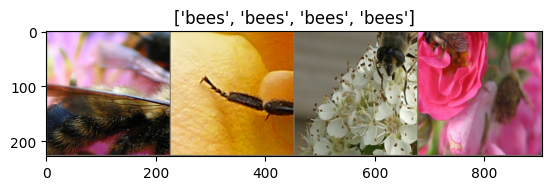

In [6]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training the model

In [7]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

Visualizing the model predictions

In [8]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Finetuning the ConvNet

In [9]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 184MB/s]


Train and evaluate

In [10]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6131 Acc: 0.6639
val Loss: 0.2189 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.5998 Acc: 0.7623
val Loss: 0.2092 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.5373 Acc: 0.7746
val Loss: 0.2387 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.3727 Acc: 0.8238
val Loss: 0.2143 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.5373 Acc: 0.7951
val Loss: 0.4227 Acc: 0.8758

Epoch 5/24
----------
train Loss: 0.5122 Acc: 0.7910
val Loss: 0.3481 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.3907 Acc: 0.8566
val Loss: 0.4505 Acc: 0.8301

Epoch 7/24
----------
train Loss: 0.3991 Acc: 0.8074
val Loss: 0.3025 Acc: 0.8824

Epoch 8/24
----------
train Loss: 0.3478 Acc: 0.8689
val Loss: 0.2102 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.4101 Acc: 0.8361
val Loss: 0.2478 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.2786 Acc: 0.8811
val Loss: 0.2734 Acc: 0.8889

Epoch 11/24
----------
train Loss: 0.2769 Acc: 0.8811
val Loss: 0.2163 Acc: 0.9150

Ep

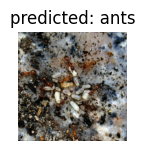

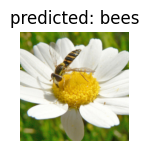

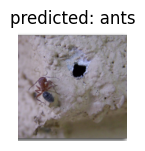

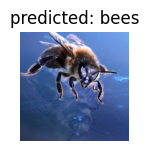

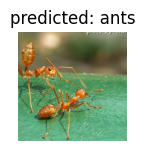

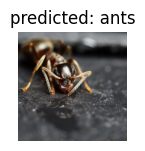

In [11]:
visualize_model(model_ft)

ConvNet as fixed feature extractor

In [14]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [15]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5787 Acc: 0.7295
val Loss: 0.2606 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.7306 Acc: 0.7090
val Loss: 0.2250 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.5272 Acc: 0.7459
val Loss: 0.2089 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.4756 Acc: 0.7910
val Loss: 0.2854 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.4401 Acc: 0.8074
val Loss: 0.2020 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.4196 Acc: 0.8156
val Loss: 0.2685 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.4547 Acc: 0.8074
val Loss: 0.2141 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.3595 Acc: 0.8443
val Loss: 0.2007 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.4158 Acc: 0.7992
val Loss: 0.2151 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3778 Acc: 0.8443
val Loss: 0.2299 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.2827 Acc: 0.8811
val Loss: 0.2008 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.2933 Acc: 0.8566
val Loss: 0.2026 Acc: 0.9477

Ep

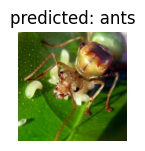

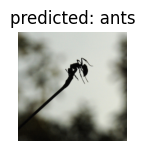

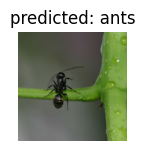

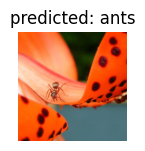

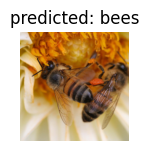

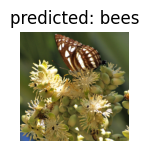

In [16]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Inference on custom images

In [17]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

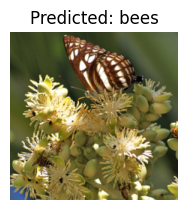

In [18]:
visualize_model_predictions(
    model_conv,
    img_path='/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

I have run the code given in the tutorial

It runs properly in my environment

**11. Write a function that outputs ResNet18 features for a given input image. Extract features for training images(in image_datasets['train']). You should get an Nx512 dimensional array**

In [19]:
print(f'Total training images: {len(image_datasets["train"])}')

Total training images: 244


In [22]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import os
import numpy as np  # Ensure numpy is imported

# Defining data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Setting up the data directory
data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}

# Creating dataloaders
dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}

# Function to extract features using ResNet18
def resnet18_features(dataloader):

    # Load pre-trained ResNet18 model with updated weights parameter
    model = models.resnet18(pretrained=True)
    # Remove the last fully connected layer
    modules = list(model.children())[:-1]
    model = nn.Sequential(*modules)
    model.eval()  # Set the model to evaluation mode

    # Moving the model to the appropriate device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # List to hold extracted features
    features_list = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, _ in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten the output
            features_list.append(outputs.cpu().numpy())

    # Concatenating all features into a single array
    features = np.concatenate(features_list, axis=0)

    # Debugging statement to check the total number of features extracted
    print(f'Total features extracted: {features.shape[0]}')  # Should be equal to the number of training images

    return features

# Extracting features for training images
train_features = resnet18_features(dataloaders['train'])
print(f'Extracted features shape: {train_features.shape}')  # Expected output: (N, 512)


Total features extracted: 244
Extracted features shape: (244, 512)


In this code, I set up a feature extraction pipeline using a pre-trained ResNet18 model with PyTorch:

I defined transformations for training and validation datasets, including resizing, cropping, and normalization.



In the resnet18_features function, I loaded the ResNet18 model, removed the final layer to focus on feature extraction, and set the model to evaluation mode. I processed batches of images through the model, collecting the outputs as flattened feature vectors.

 After extracting features from all images, I concatenated them into a single NumPy array and printed the total number of features extracted, confirming that the shape matched the number of training images.

**12. Compare L2 regularized logistic regression and and random forest (do grid search on max depth and numberof trees). Test the final model on test data and show the results -- accuracy and F1 score**

In [23]:
import os
from torchvision import datasets, transforms

# Defining data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Seting the data directory
data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'

# Loading the dataset
image_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transforms)

# Splitting data into inputs and labels
X_train = []
y_train = []

for img, label in image_data:
    X_train.append(img.numpy())
    y_train.append(label)

# Converting to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


In the above code, I defined transformations to resize images to 224x224 pixels, convert them to tensors, and normalize them with specific mean and standard deviation values.


I created empty lists for features (X_train) and labels (y_train), iterating through the dataset to append each image's tensor and label.
Finally, I converted the lists of images and labels into NumPy arrays for further analysis.








In [24]:
# Load the validation dataset
image_data_val = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=data_transforms)

# Splitting data into inputs and labels for validation
X_val = []
y_val = []

for img, label in image_data_val:
    X_val.append(img.numpy())
    y_val.append(label)

# Converting to NumPy arrays
X_val = np.array(X_val)
y_val = np.array(y_val)


NOTE: Here I have chosen the data "val" from the dataset to test the data

In this above code, I have loaded and prepared the validation dataset for training:



I have initialized empty lists for features (X_val) and labels (y_val), then iterated through the validation dataset to append each image's tensor and its corresponding label.

Finally, I converted the lists of validation images and labels into NumPy arrays for further processing.

LOGISTIC_REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

X_train_flat = np.array(X_train).reshape(len(X_train), -1)


# Logistic Regression
log_reg = LogisticRegression(penalty='l2', solver='liblinear')
param_grid = {'C': [0.1, 1, 10]}
grid_log = GridSearchCV(log_reg, param_grid, cv=5)
grid_log.fit(X_train_flat, y_train)
print(f"Best parameters for Logistic Regression: {grid_log.best_params_}")

# Flatten the validation set as well
X_val_flat = np.array(X_val).reshape(len(X_val), -1)

# Predicting and evaluating the Logistic Regression model on validation data
y_pred_log = grid_log.predict(X_val_flat)
accuracy_log = accuracy_score(y_val, y_pred_log)
f1_log = f1_score(y_val, y_pred_log, average='weighted')
print(f"Logistic Regression Accuracy on Validation: {accuracy_log:.4f}, F1 Score: {f1_log:.4f}")

Best parameters for Logistic Regression: {'C': 0.1}
Logistic Regression Accuracy on Validation: 0.5359, F1 Score: 0.5365


In this code, I have implemented a logistic regression model with hyperparameter tuning and evaluated its performance on the validation set:

First, I flattened the training data (X_train) to ensure each image is represented as a one-dimensional array. This format is necessary for logistic regression.

I used GridSearchCV to tune the regularization parameter C of the logistic regression model, training across five folds. After fitting, I printed the best C value found

I flattened the validation data (X_val) similarly and used the tuned logistic regression model to make predictions. Finally, I calculated both the accuracy and weighted F1 score to assess model performance on the validation set

RANDOM_FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train_flat = np.array(X_train).reshape(len(X_train), -1)
X_val_flat = np.array(X_val).reshape(len(X_val), -1)

# Random Forest
rf_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_rf.fit(X_train_flat, y_train)
print(f"Best parameters for Random Forest Model: {grid_rf.best_params_}")


# Predicting and evaluating the Random Forest model
y_pred_rf = grid_rf.predict(X_val_flat)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf, average='weighted')
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}")

Best parameters for Random Forest Model: {'max_depth': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.6209, F1 Score: 0.6211


Here,first I have reshaped both the training (X_train) and validation (X_val) datasets into one-dimensional arrays to make them compatible with the Random Forest model.


I have set up a Random Forest classifier with hyperparameters (n_estimators and max_depth) defined in param_grid_rf.
Utilized GridSearchCV and performed a 5-fold cross-validation to find the best combination of these parameters.


Then I used the tuned Random Forest model to predict labels on the validation set.
Finally calculated  the accuracy and weighted F1 score to evaluate the model’s performance on the validation data.


**13. Summarize your findings and write your references**

#### **Model Performance:**

*Logistic Regression:*

Best parameters for Logistic Regression: {'C': 0.1}

Logistic Regression Accuracy on Validation: 0.5359, F1 Score: 0.5365


*Random Forest:*

Best parameters for Random Forest Model: {'max_depth': 10, 'n_estimators': 200}

Random Forest Accuracy: 0.6209, F1 Score: 0.6211


#### **Hyperparameter Tuning:**

The grid search for the random forest revealed that the number of trees (n_estimators)

 and controlling the maximum depth of the trees (max_depth)
significantly influenced the model's performance These hyperparameters help to balance the trade-off between bias and variance.

#### **Interpretation:**

Logistic regression is often easier to interpret due to its linear nature, making it suitable for scenarios where model transparency is crucial.
Random forests, while less interpretable, can capture complex relationships and interactions between features, often resulting in better performance for non-linear datasets.

**Conclusion:**

In this comparison, the random forest model demonstrated superior predictive performance over logistic regression, highlighting its capability in handling more complex datasets.
However, logistic regression remains a valuable tool, particularly when interpretability is a key requirement.

#### ***REFERENCES:***











#### Lecture slides: EE353_769 08 Linear Classification.pdf 
[ https://drive.google.com/file/d/1uEaHob2ujzIxieJ1X3FEM6OZy7qui488/view?usp=sharing ]
#### https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)

#### https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html


# ***THANKYOU 😃***